<a href="https://colab.research.google.com/github/SaijyotiTripathy/ASCI-2021/blob/main/Copy_of_original_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import pandas as pd
import matplotlib
import requests
import json
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install clusteval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.5 MB/s eta 0:00:00


In [5]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.0 MB/s eta 0:00:00


In [6]:
pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=d544ad70466af2caafd055ef53afba6d0863f4b97f5f8a9891669f9333a46e17
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [7]:

import pubchempy as pcp

In [7]:
original_data = pd.read_csv('/content/chemical_data_with_properties.csv')
original_data.head()

,Unnamed: 0,Compound_smiles,Chemical Name,IUPAC Name,InChI,InChIKey,smiles,Molecular Formula,CAS,Synonyms,...,Heavy Atom Count,Formal Charge,Complexity,Isotope Atom Count,Defined Atom Stereocenter Count,Undefined Atom Stereocenter Count,Defined Bond Stereocenter Count,Undefined Bond Stereocenter Count,Covalently-Bonded Unit Count,Compound Is Canonicalized
0,0,C1CCC(CC1)NC2CCCCC2,Dicyclohexylamine,N-cyclohexylcyclohexanamine,InChI=1S/C12H23N/c1-3-7-11(8-4-1)13-12-9-5-2-6...,XBPCUCUWBYBCDP-UHFFFAOYSA-N,C1CCC(CC1)NC2CCCCC2,C6H11NHC6H11,101-83-7,"['DCH', 'J-000503', 'Cy2NH', 'InChI=1/C12H23N/...",...,13,0,116.0,0,0,0,0,0,1,Yes
1,1,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,Clonidine,"N-(2,6-dichlorophenyl)-4,5-dihydro-1H-imidazol...",InChI=1S/C9H9Cl2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,GJSURZIOUXUGAL-UHFFFAOYSA-N,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,C9H9Cl2N3,4205-90-7,"['Adesipress', 'D02AZT', 'Clonidinhydrochlorid...",...,14,0,222.0,0,0,0,0,0,1,Yes
2,2,CC1=C(C(=CC=C1)C)NC2=NCCCS2,Xylazine,"N-(2,6-dimethylphenyl)-5,6-dihydro-4H-1,3-thia...",InChI=1S/C12H16N2S/c1-9-5-3-6-10(2)11(9)14-12-...,BPICBUSOMSTKRF-UHFFFAOYSA-N,CC1=C(C(=CC=C1)C)NC2=NCCCS2,C12H16N2S,7361-61-7,"['MLS000054617', 'Xylapan', 'HY-B0443', 'BCBcM...",...,15,0,230.0,0,0,0,0,0,1,Yes
3,3,CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",InChI=1S/C25H54N2/c1-3-4-5-6-7-8-9-10-11-12-13...,RAWRXUWCUONWIA-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,NaN,"['SCHEMBL446299', 'Behenyl Propylenediamine']",...,27,0,255.0,0,0,1,0,0,1,Yes
4,4,CCCCCCCCCCCCCCCCCCNC(C)C,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,InChI=1S/C21H45N/c1-4-5-6-7-8-9-10-11-12-13-14...,WHFZOMWNDCWQRF-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,13329-71-0,"['Isopropyloctadecylamine', 'N-(propan-2-yl)oc...",...,22,0,188.0,0,0,0,0,0,1,Yes


In [8]:

def get_info(cid):
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{cid}/JSON/?response_type=save&response_basename=COMPOUND_CID_{cid}'
    data = requests.get(url)
    data = data.json()

    for each in data["Record"]["Section"]:
        use_manufacturing_data = {}
        if each["TOCHeading"] == "Use and Manufacturing" and "Section" in each.keys():
            for prop in each["Section"]:
                # Uses
                if prop["TOCHeading"] == "Uses":
                    prop_data = []
                    if "Information" in prop.keys():
                        for each1 in prop["Information"]:
                            if "Value" in each1.keys():
                                if "ExternalTableName" in each1["Value"].keys():
                                    uses_data = uses(cid, each1["Value"]["ExternalTableName"])
                                    if uses_data != []:
                                        prop_data = prop_data + uses_data
                                if "StringWithMarkup" in each1["Value"].keys():
                                    prop_data.append(each1["Value"]["StringWithMarkup"][0]["String"])

                    if "Section" in prop.keys():
                      section_data= {}
                      for each1 in prop["Section"]:
                        res=[]
                        for each2 in each1["Information"]:
                          for each3 in each2["Value"]["StringWithMarkup"]:
                            res.append(each3["String"])

                        res= list(set(res))
                        if len(res)==1:
                          use_manufacturing_data[each1["TOCHeading"]]=res[0]
                        if len(res)>1:
                          use_manufacturing_data[each1["TOCHeading"]]=res

                    if prop_data != []:
                        use_manufacturing_data[prop["TOCHeading"]] = prop_data
            return use_manufacturing_data

def uses(cid, table_name):
    categories = []
    url = f"https://pubchem.ncbi.nlm.nih.gov/sdq/sdqagent.cgi?infmt=json&outfmt=json&query={{%22download%22:%22*%22,%22collection%22:%22{table_name}%22,%22where%22:{{%22ands%22:[{{%22cid%22:%22{str(cid)}%22}}]}},%22order%22:[%22category,asc%22],%22start%22:1,%22limit%22:10000000,%22downloadfilename%22:%22pubchem_cid_{str(cid)}_{table_name}%22}}"
    data = requests.get(url)
    data = data.json()
    for each in data:
        categories.append(each['category'])
    return categories

In [35]:
uses_list = []
for smiles_value in original_data['smiles']:
    cid = pcp.get_cids(smiles_value, 'smiles')[0]
    print(cid, smiles_value)
    data = get_info(cid)
    print(data)
    if data is not None or data!={}:
        uses_list.append(data)
    else:
        uses_list.append(np.nan)

original_data["Uses"] = uses_list

7582 C1CCC(CC1)NC2CCCCC2
{'Use Classification': 'Hazard Classes and Categories -> Corrosives', 'Industry Uses': ['Adhesives and sealant chemicals', 'Heat transferring agent', 'Solvents (for cleaning or degreasing)', 'Plating agents and surface treating agents', 'Processing aids not otherwise specified', 'Lubricants and lubricant additives', 'Intermediate', 'Lubricating agent', 'Corrosion inhibitors and anti-scaling agents', 'Not Known or Reasonably Ascertainable', 'Absorbent', 'Corrosion inhibitor'], 'Consumer Uses': ['Adhesives and sealant chemicals', 'Solvents (for cleaning or degreasing)', 'Lubricants and lubricant additives', 'Etching agent', 'Intermediate', 'Corrosion inhibitors and anti-scaling agents', 'Not Known or Reasonably Ascertainable', 'Hardener', 'Corrosion inhibitor'], 'Uses': ['Used to make drugs, soaps, detergents, vapor-phase corrosion inhibitors , dyestuffs, emulsifying agents, and acid gas absorbents;  Also used in insecticides and as a plasticizer, antioxidant (ru

In [36]:
all_keys = set().union(*(d.keys() if isinstance(d, dict) else [] for d in uses_list))

for key in all_keys:
    original_data[key] = [d.get(key, np.nan) if isinstance(d, dict) else np.nan for d in uses_list]

In [37]:
original_data

,Unnamed: 0,Compound_smiles,Chemical Name,IUPAC Name,InChI,InChIKey,smiles,Molecular Formula,CAS,Synonyms,...,Undefined Atom Stereocenter Count,Defined Bond Stereocenter Count,Undefined Bond Stereocenter Count,Covalently-Bonded Unit Count,Compound Is Canonicalized,Uses,Use Classification,Consumer Uses,Industry Uses,Household Products
0,0,C1CCC(CC1)NC2CCCCC2,Dicyclohexylamine,N-cyclohexylcyclohexanamine,InChI=1S/C12H23N/c1-3-7-11(8-4-1)13-12-9-5-2-6...,XBPCUCUWBYBCDP-UHFFFAOYSA-N,C1CCC(CC1)NC2CCCCC2,C12H23N,101-83-7,"['N-Cyclohexylcyclohexanamine', 'D0435', 'CCRI...",...,0,0,0,1,Yes,"[Used to make drugs, soaps, detergents, vapor-...",Hazard Classes and Categories -> Corrosives,"[Adhesives and sealant chemicals, Solvents (fo...","[Adhesives and sealant chemicals, Heat transfe...",NaN
1,1,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,Clonidine,"N-(2,6-dichlorophenyl)-4,5-dihydro-1H-imidazol...",InChI=1S/C9H9Cl2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,GJSURZIOUXUGAL-UHFFFAOYSA-N,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,C9H9Cl2N3,4205-90-7,"['2-(2,6-dichlorophenyl-imino)-imidazolidine',...",...,0,0,0,1,Yes,"[MEDICATION, May be used as an adjunct in the ...",[Human Drugs -> FDA Approved Drug Products wit...,NaN,NaN,NaN
2,2,CC1=C(C(=CC=C1)C)NC2=NCCCS2,Xylazine,"N-(2,6-dimethylphenyl)-5,6-dihydro-4H-1,3-thia...",InChI=1S/C12H16N2S/c1-9-5-3-6-10(2)11(9)14-12-...,BPICBUSOMSTKRF-UHFFFAOYSA-N,CC1=C(C(=CC=C1)C)NC2=NCCCS2,C12H16N2S,7361-61-7,"['XYLAZINE [MART.]', 'KBioGR_000937', 'Prestwi...",...,0,0,0,1,Yes,NaN,[Animal Drugs -> FDA Approved Animal Drug Prod...,NaN,NaN,NaN
3,3,C1=CC=C(C=C1)NC2=CC=CC3=CC=CC=C32,N-Phenyl-1-naphthylamine,N-phenylnaphthalen-1-amine,InChI=1S/C16H13N/c1-2-9-14(10-3-1)17-16-12-6-8...,XQVWYOYUZDUNRW-UHFFFAOYSA-N,C1=CC=C(C=C1)NC2=CC=CC3=CC=CC=C32,C16H13N,90-30-2,"['1-(fenilamino) naftaleno', '1-(N-fenilamino)...",...,0,0,0,1,Yes,"[Manufactured formulations, Vehicle -> engine ...",NaN,"[Lubricating agent, Antioxidant, Lubricants an...","[Lubricating agent, Antioxidant, Lubricants an...","[• Auto Products, Information on 1 consumer pr..."
4,4,C1=CC=C2C(=C1)NC3=C(S2)C=CC(=C3)Cl,2-Chlorophenothiazine,2-chloro-10H-phenothiazine,InChI=1S/C12H8ClNS/c13-8-5-6-12-10(7-8)14-9-3-...,KFZGLJSYQXZIGP-UHFFFAOYSA-N,C1=CC=C2C(=C1)NC3=C(S2)C=CC(=C3)Cl,C12H8ClNS,92-39-7,"['CHEMBL1411769', '2-Chlorophenothiazine, 95%'...",...,0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,CCCCCCC(C)[Sn](CCCC)(C(C)CCCCCC)C(C)CCCCCC,n-Butyl tri-2-octyltin,butyl-tri(octan-2-yl)stannane,InChI=1S/3C8H17.C4H9.Sn/c3*1-3-5-7-8-6-4-2;1-3...,AIULJKMLKGPVML-UHFFFAOYSA-N,CCCCCCC(C)[Sn](CCCC)(C(C)CCCCCC)C(C)CCCCCC,C28H60Sn,NaN,"['AIULJKMLKGPVML-UHFFFAOYSA-N', 'n-butyl tri-2...",...,3,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
481,481,CCCCCCC(C)[Sn](C(C)CCCCCC)C(C)CCCCCC,CID 12790091,NaN,"InChI=1S/3C8H17.Sn/c3*1-3-5-7-8-6-4-2;/h3*3H,4...",BYVUGVGKOPAMGQ-UHFFFAOYSA-N,CCCCCCC(C)[Sn](C(C)CCCCCC)C(C)CCCCCC,C24H51Sn,NaN,NaN,...,3,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
482,482,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,Tetrahectane,tetrahectane,InChI=1S/C104H210/c1-3-5-7-9-11-13-15-17-19-21...,RXZOBXHWZYANKG-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C104H210,NaN,NaN,...,0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
483,483,CCCCCCCC[Te]CCCCCCCC,1-Octyltellanyloctane,1-octyltellanyloctane,InChI=1S/C16H34Te/c1-3-5-7-9-11-13-15-17-16-14...,WNBSJTWEUIXSDZ-UHFFFAOYSA-N,CCCCCCCC[Te]CCCCCCCC,C16H34Te,NaN,NaN,...,0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN


In [38]:
original_data.to_csv('chemical_data_with_properties_and_uses.csv', index=False)

In [9]:
df= pd.read_csv('chemical_data_with_properties_and_uses.csv')

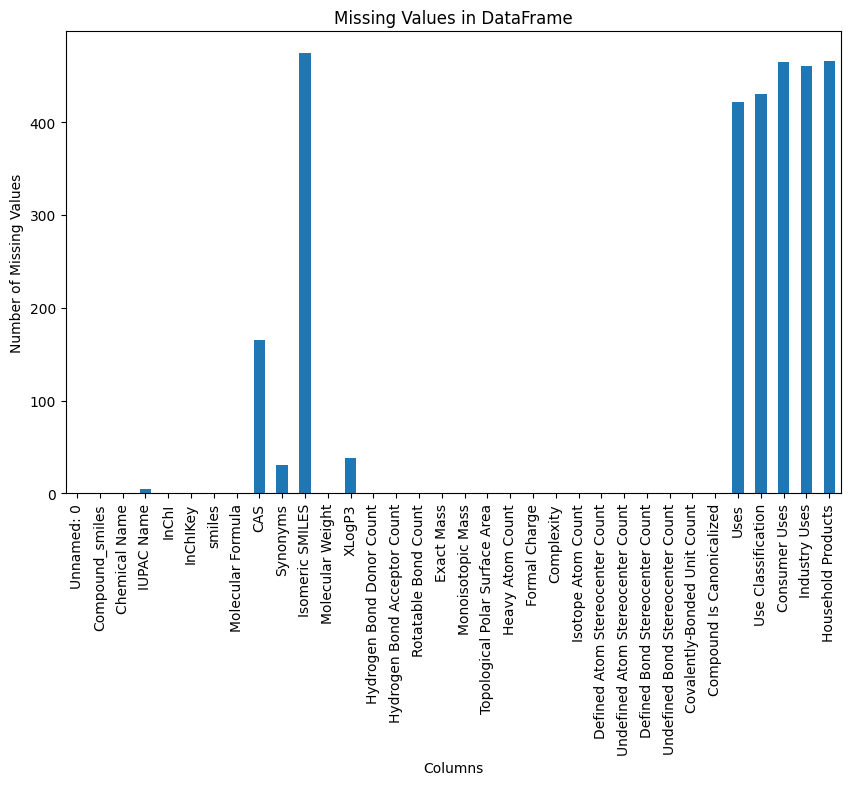

In [10]:
import matplotlib.pyplot as plt
missing_values = df.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [11]:
df.isna().sum()

Unnamed: 0                             0
Compound_smiles                        0
Chemical Name                          0
IUPAC Name                             5
InChI                                  0
InChIKey                               0
smiles                                 0
Molecular Formula                      0
CAS                                  165
Synonyms                              31
Isomeric SMILES                      474
Molecular Weight                       0
XLogP3                                38
Hydrogen Bond Donor Count              0
Hydrogen Bond Acceptor Count           0
Rotatable Bond Count                   0
Exact Mass                             0
Monoisotopic Mass                      0
Topological Polar Surface Area         0
Heavy Atom Count                       0
Formal Charge                          0
Complexity                             0
Isotope Atom Count                     0
Defined Atom Stereocenter Count        0
Undefined Atom S

In [12]:
df.columns

Index(['Unnamed: 0', 'Compound_smiles', 'Chemical Name', 'IUPAC Name', 'InChI',
       'InChIKey', 'smiles', 'Molecular Formula', 'CAS', 'Synonyms',
       'Isomeric SMILES', 'Molecular Weight', 'XLogP3',
       'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count',
       'Rotatable Bond Count', 'Exact Mass', 'Monoisotopic Mass',
       'Topological Polar Surface Area', 'Heavy Atom Count', 'Formal Charge',
       'Complexity', 'Isotope Atom Count', 'Defined Atom Stereocenter Count',
       'Undefined Atom Stereocenter Count', 'Defined Bond Stereocenter Count',
       'Undefined Bond Stereocenter Count', 'Covalently-Bonded Unit Count',
       'Compound Is Canonicalized', 'Uses', 'Use Classification',
       'Consumer Uses', 'Industry Uses', 'Household Products'],
      dtype='object')

In [13]:
df['Uses']=df['Uses'].fillna(df['Use Classification'])
df['Uses']=df['Uses'].fillna(df['Consumer Uses'])
df['Uses']=df['Uses'].fillna(df['Industry Uses'])
df['Uses']=df['Uses'].fillna(df['Household Products'])

In [14]:
df.isna().sum()

Unnamed: 0                             0
Compound_smiles                        0
Chemical Name                          0
IUPAC Name                             5
InChI                                  0
InChIKey                               0
smiles                                 0
Molecular Formula                      0
CAS                                  165
Synonyms                              31
Isomeric SMILES                      474
Molecular Weight                       0
XLogP3                                38
Hydrogen Bond Donor Count              0
Hydrogen Bond Acceptor Count           0
Rotatable Bond Count                   0
Exact Mass                             0
Monoisotopic Mass                      0
Topological Polar Surface Area         0
Heavy Atom Count                       0
Formal Charge                          0
Complexity                             0
Isotope Atom Count                     0
Defined Atom Stereocenter Count        0
Undefined Atom S

In [15]:
df

,Unnamed: 0,Compound_smiles,Chemical Name,IUPAC Name,InChI,InChIKey,smiles,Molecular Formula,CAS,Synonyms,...,Undefined Atom Stereocenter Count,Defined Bond Stereocenter Count,Undefined Bond Stereocenter Count,Covalently-Bonded Unit Count,Compound Is Canonicalized,Uses,Use Classification,Consumer Uses,Industry Uses,Household Products
0,0,C1CCC(CC1)NC2CCCCC2,Dicyclohexylamine,N-cyclohexylcyclohexanamine,InChI=1S/C12H23N/c1-3-7-11(8-4-1)13-12-9-5-2-6...,XBPCUCUWBYBCDP-UHFFFAOYSA-N,C1CCC(CC1)NC2CCCCC2,C12H23N,101-83-7,"['N-Cyclohexylcyclohexanamine', 'D0435', 'CCRI...",...,0,0,0,1,Yes,"['Used to make drugs, soaps, detergents, vapor...",Hazard Classes and Categories -> Corrosives,"['Adhesives and sealant chemicals', 'Solvents ...","['Adhesives and sealant chemicals', 'Heat tran...",NaN
1,1,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,Clonidine,"N-(2,6-dichlorophenyl)-4,5-dihydro-1H-imidazol...",InChI=1S/C9H9Cl2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,GJSURZIOUXUGAL-UHFFFAOYSA-N,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,C9H9Cl2N3,4205-90-7,"['2-(2,6-dichlorophenyl-imino)-imidazolidine',...",...,0,0,0,1,Yes,"['MEDICATION', 'May be used as an adjunct in t...",['Human Drugs -> FDA Approved Drug Products wi...,NaN,NaN,NaN
2,2,CC1=C(C(=CC=C1)C)NC2=NCCCS2,Xylazine,"N-(2,6-dimethylphenyl)-5,6-dihydro-4H-1,3-thia...",InChI=1S/C12H16N2S/c1-9-5-3-6-10(2)11(9)14-12-...,BPICBUSOMSTKRF-UHFFFAOYSA-N,CC1=C(C(=CC=C1)C)NC2=NCCCS2,C12H16N2S,7361-61-7,"['XYLAZINE [MART.]', 'KBioGR_000937', 'Prestwi...",...,0,0,0,1,Yes,['Animal Drugs -> FDA Approved Animal Drug Pro...,['Animal Drugs -> FDA Approved Animal Drug Pro...,NaN,NaN,NaN
3,3,C1=CC=C(C=C1)NC2=CC=CC3=CC=CC=C32,N-Phenyl-1-naphthylamine,N-phenylnaphthalen-1-amine,InChI=1S/C16H13N/c1-2-9-14(10-3-1)17-16-12-6-8...,XQVWYOYUZDUNRW-UHFFFAOYSA-N,C1=CC=C(C=C1)NC2=CC=CC3=CC=CC=C32,C16H13N,90-30-2,"['1-(fenilamino) naftaleno', '1-(N-fenilamino)...",...,0,0,0,1,Yes,"['Manufactured formulations', 'Vehicle -> engi...",NaN,"['Lubricating agent', 'Antioxidant', 'Lubrican...","['Lubricating agent', 'Antioxidant', 'Lubrican...","['• Auto Products', 'Information on 1 consumer..."
4,4,C1=CC=C2C(=C1)NC3=C(S2)C=CC(=C3)Cl,2-Chlorophenothiazine,2-chloro-10H-phenothiazine,InChI=1S/C12H8ClNS/c13-8-5-6-12-10(7-8)14-9-3-...,KFZGLJSYQXZIGP-UHFFFAOYSA-N,C1=CC=C2C(=C1)NC3=C(S2)C=CC(=C3)Cl,C12H8ClNS,92-39-7,"['CHEMBL1411769', '2-Chlorophenothiazine, 95%'...",...,0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,CCCCCCC(C)[Sn](CCCC)(C(C)CCCCCC)C(C)CCCCCC,n-Butyl tri-2-octyltin,butyl-tri(octan-2-yl)stannane,InChI=1S/3C8H17.C4H9.Sn/c3*1-3-5-7-8-6-4-2;1-3...,AIULJKMLKGPVML-UHFFFAOYSA-N,CCCCCCC(C)[Sn](CCCC)(C(C)CCCCCC)C(C)CCCCCC,C28H60Sn,NaN,"['AIULJKMLKGPVML-UHFFFAOYSA-N', 'n-butyl tri-2...",...,3,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
481,481,CCCCCCC(C)[Sn](C(C)CCCCCC)C(C)CCCCCC,CID 12790091,NaN,"InChI=1S/3C8H17.Sn/c3*1-3-5-7-8-6-4-2;/h3*3H,4...",BYVUGVGKOPAMGQ-UHFFFAOYSA-N,CCCCCCC(C)[Sn](C(C)CCCCCC)C(C)CCCCCC,C24H51Sn,NaN,NaN,...,3,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
482,482,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,Tetrahectane,tetrahectane,InChI=1S/C104H210/c1-3-5-7-9-11-13-15-17-19-21...,RXZOBXHWZYANKG-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C104H210,NaN,NaN,...,0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN
483,483,CCCCCCCC[Te]CCCCCCCC,1-Octyltellanyloctane,1-octyltellanyloctane,InChI=1S/C16H34Te/c1-3-5-7-9-11-13-15-17-16-14...,WNBSJTWEUIXSDZ-UHFFFAOYSA-N,CCCCCCCC[Te]CCCCCCCC,C16H34Te,NaN,NaN,...,0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN


In [8]:
df2= pd.read_csv('/content/props_and_classification.csv')


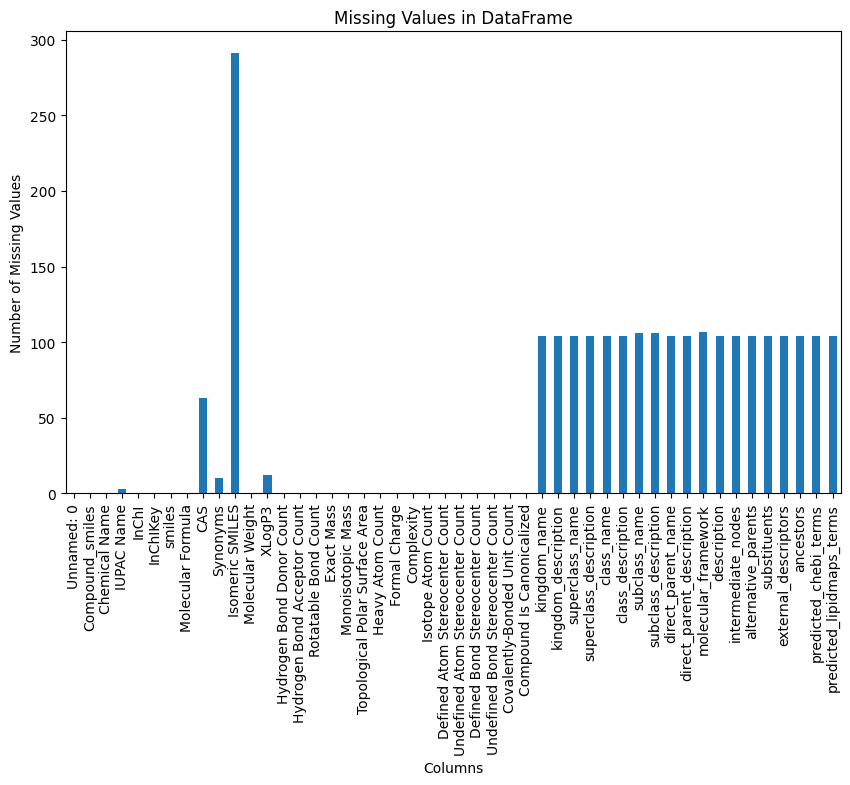

In [9]:
import matplotlib.pyplot as plt
missing_values = df2.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [10]:
df2.isna().sum()

Unnamed: 0                             0
Compound_smiles                        0
Chemical Name                          0
IUPAC Name                             3
InChI                                  0
InChIKey                               0
smiles                                 0
Molecular Formula                      0
CAS                                   63
Synonyms                              10
Isomeric SMILES                      291
Molecular Weight                       0
XLogP3                                12
Hydrogen Bond Donor Count              0
Hydrogen Bond Acceptor Count           0
Rotatable Bond Count                   0
Exact Mass                             0
Monoisotopic Mass                      0
Topological Polar Surface Area         0
Heavy Atom Count                       0
Formal Charge                          0
Complexity                             0
Isotope Atom Count                     0
Defined Atom Stereocenter Count        0
Undefined Atom S

In [11]:
df2.dropna(subset=['kingdom_name'], inplace=True)
df2.reset_index(drop=True, inplace=True)

In [12]:
df2.columns

Index(['Unnamed: 0', 'Compound_smiles', 'Chemical Name', 'IUPAC Name', 'InChI',
       'InChIKey', 'smiles', 'Molecular Formula', 'CAS', 'Synonyms',
       'Isomeric SMILES', 'Molecular Weight', 'XLogP3',
       'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count',
       'Rotatable Bond Count', 'Exact Mass', 'Monoisotopic Mass',
       'Topological Polar Surface Area', 'Heavy Atom Count', 'Formal Charge',
       'Complexity', 'Isotope Atom Count', 'Defined Atom Stereocenter Count',
       'Undefined Atom Stereocenter Count', 'Defined Bond Stereocenter Count',
       'Undefined Bond Stereocenter Count', 'Covalently-Bonded Unit Count',
       'Compound Is Canonicalized', 'kingdom_name', 'kingdom_description',
       'superclass_name', 'superclass_description', 'class_name',
       'class_description', 'subclass_name', 'subclass_description',
       'direct_parent_name', 'direct_parent_description',
       'molecular_framework', 'description', 'intermediate_nodes',
       'alterna

In [13]:
original_data= pd.read_csv('/content/props_and_classification.csv')

In [14]:
import re
def extract_elements(formula):
    elements = re.findall(r'[A-Z][a-z]*\d*', formula)
    element_dict = {}

    for element in elements:
        match = re.match(r'([A-Z][a-z]*)(\d*)', element)
        element_name = match.group(1)
        element_dict[element_name]=0

    for element in elements:
        match = re.match(r'([A-Z][a-z]*)(\d*)', element)
        element_name = match.group(1)
        element_count = int(match.group(2)) if match.group(2) else 1
        element_dict[element_name] += element_count
    return element_dict

original_data['Elements'] = original_data['Molecular Formula'].apply(extract_elements)
unique_elements = set()
for element_dict in original_data['Elements']:
    unique_elements.update(element_dict.keys())

unique_elements.discard('')

for element in unique_elements:
    original_data[element] = original_data['Elements'].apply(lambda x: x.get(element, 0))

original_data.drop(columns=['Elements'], inplace=True)

original_data[['Molecular Formula','F', 'C', 'Sn', 'Hg',
       'Cl', 'Mg', 'H', 'S', 'N', 'Sb', 'O', 'Br']].tail(10)

,Molecular Formula,F,C,Sn,Hg,Cl,Mg,H,S,N,Sb,O,Br
286,C8H18O,0,8,0,0,0,0,18,0,0,0,1,0
287,C20H40,0,20,0,0,0,0,40,0,0,0,0,0
288,C24H48,0,24,0,0,0,0,48,0,0,0,0,0
289,C28H56,0,28,0,0,0,0,56,0,0,0,0,0
290,C54H110,0,54,0,0,0,0,110,0,0,0,0,0
291,C57H116,0,57,0,0,0,0,116,0,0,0,0,0
292,C95H192,0,95,0,0,0,0,192,0,0,0,0,0
293,C43H88,0,43,0,0,0,0,88,0,0,0,0,0
294,C46H94,0,46,0,0,0,0,94,0,0,0,0,0
295,C58H118,0,58,0,0,0,0,118,0,0,0,0,0


In [15]:
original_data.to_csv('original_data.csv')

In [16]:
df=original_data
df.head()

,Unnamed: 0,Compound_smiles,Chemical Name,IUPAC Name,InChI,InChIKey,smiles,Molecular Formula,CAS,Synonyms,...,N,S,Mg,C,O,Hg,H,Sb,F,Br
0,0,C1CCC(CC1)NC2CCCCC2,Dicyclohexylamine,N-cyclohexylcyclohexanamine,InChI=1S/C12H23N/c1-3-7-11(8-4-1)13-12-9-5-2-6...,XBPCUCUWBYBCDP-UHFFFAOYSA-N,C1CCC(CC1)NC2CCCCC2,C6H11NHC6H11,101-83-7,"['DCH', 'J-000503', 'Cy2NH', 'InChI=1/C12H23N/...",...,1,0,0,12,0,0,23,0,0,0
1,1,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,Clonidine,"N-(2,6-dichlorophenyl)-4,5-dihydro-1H-imidazol...",InChI=1S/C9H9Cl2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,GJSURZIOUXUGAL-UHFFFAOYSA-N,C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,C9H9Cl2N3,4205-90-7,"['Adesipress', 'D02AZT', 'Clonidinhydrochlorid...",...,3,0,0,9,0,0,9,0,0,0
2,2,CC1=C(C(=CC=C1)C)NC2=NCCCS2,Xylazine,"N-(2,6-dimethylphenyl)-5,6-dihydro-4H-1,3-thia...",InChI=1S/C12H16N2S/c1-9-5-3-6-10(2)11(9)14-12-...,BPICBUSOMSTKRF-UHFFFAOYSA-N,CC1=C(C(=CC=C1)C)NC2=NCCCS2,C12H16N2S,7361-61-7,"['MLS000054617', 'Xylapan', 'HY-B0443', 'BCBcM...",...,2,1,0,12,0,0,16,0,0,0
3,3,CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",InChI=1S/C25H54N2/c1-3-4-5-6-7-8-9-10-11-12-13...,RAWRXUWCUONWIA-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,NaN,"['SCHEMBL446299', 'Behenyl Propylenediamine']",...,2,0,0,25,0,0,54,0,0,0
4,4,CCCCCCCCCCCCCCCCCCNC(C)C,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,InChI=1S/C21H45N/c1-4-5-6-7-8-9-10-11-12-13-14...,WHFZOMWNDCWQRF-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,13329-71-0,"['Isopropyloctadecylamine', 'N-(propan-2-yl)oc...",...,1,0,0,21,0,0,45,0,0,0


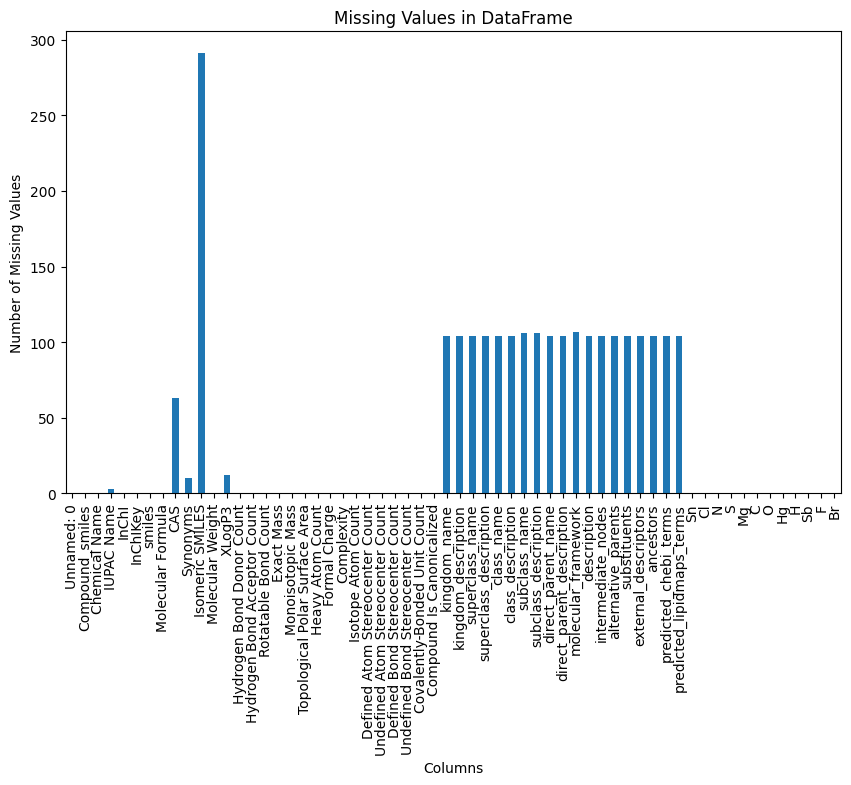

In [17]:
import matplotlib.pyplot as plt
missing_values = df.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [18]:
df.columns

Index(['Unnamed: 0', 'Compound_smiles', 'Chemical Name', 'IUPAC Name', 'InChI',
       'InChIKey', 'smiles', 'Molecular Formula', 'CAS', 'Synonyms',
       'Isomeric SMILES', 'Molecular Weight', 'XLogP3',
       'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count',
       'Rotatable Bond Count', 'Exact Mass', 'Monoisotopic Mass',
       'Topological Polar Surface Area', 'Heavy Atom Count', 'Formal Charge',
       'Complexity', 'Isotope Atom Count', 'Defined Atom Stereocenter Count',
       'Undefined Atom Stereocenter Count', 'Defined Bond Stereocenter Count',
       'Undefined Bond Stereocenter Count', 'Covalently-Bonded Unit Count',
       'Compound Is Canonicalized', 'kingdom_name', 'kingdom_description',
       'superclass_name', 'superclass_description', 'class_name',
       'class_description', 'subclass_name', 'subclass_description',
       'direct_parent_name', 'direct_parent_description',
       'molecular_framework', 'description', 'intermediate_nodes',
       'alterna

In [19]:
df=df[['Chemical Name', 'IUPAC Name', 'smiles', 'Molecular Formula', 'Molecular Weight', 'XLogP3',
       'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count',
       'Rotatable Bond Count', 'Exact Mass', 'Monoisotopic Mass',
       'Topological Polar Surface Area', 'Heavy Atom Count', 'Formal Charge',
       'Complexity', 'Isotope Atom Count', 'Defined Atom Stereocenter Count',
       'Undefined Atom Stereocenter Count', 'Defined Bond Stereocenter Count',
       'Undefined Bond Stereocenter Count', 'Covalently-Bonded Unit Count',
       'Compound Is Canonicalized', 'kingdom_name',
       'superclass_name', 'class_name', 'subclass_name',
       'direct_parent_name', 'molecular_framework',
       'Br', 'Sn', 'N', 'F', 'Sb', 'H', 'Hg', 'O', 'Mg', 'Cl', 'S', 'C']]
df

,Chemical Name,IUPAC Name,smiles,Molecular Formula,Molecular Weight,XLogP3,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotatable Bond Count,Exact Mass,...,N,F,Sb,H,Hg,O,Mg,Cl,S,C
0,Dicyclohexylamine,N-cyclohexylcyclohexanamine,C1CCC(CC1)NC2CCCCC2,C6H11NHC6H11,181.32 g/mol,3.4,1,1,2,181.183049738 g/mol,...,1,0,0,23,0,0,0,0,0,12
1,Clonidine,"N-(2,6-dichlorophenyl)-4,5-dihydro-1H-imidazol...",C1CN=C(N1)NC2=C(C=CC=C2Cl)Cl,C9H9Cl2N3,230.09 g/mol,1.6,2,1,2,229.0173527 g/mol,...,3,0,0,9,0,0,0,2,0,9
2,Xylazine,"N-(2,6-dimethylphenyl)-5,6-dihydro-4H-1,3-thia...",CC1=C(C(=CC=C1)C)NC2=NCCCS2,C12H16N2S,220.34 g/mol,2.8,1,2,2,220.10341969 g/mol,...,2,0,0,16,0,0,0,0,1,12
3,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,382.7 g/mol,10.3,2,2,23,382.428699731 g/mol,...,2,0,0,54,0,0,0,0,0,25
4,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,311.6 g/mol,9.4,1,1,18,311.355200440 g/mol,...,1,0,0,45,0,0,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Heptapentacontane,heptapentacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C57H116,801.5 g/mol,30.5,0,0,54,800.90770370 g/mol,...,0,0,0,116,0,0,0,0,0,57
292,Pentanonacontane,pentanonacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C95H192,1334.5 g/mol,51.1,0,0,92,1334.50576096 g/mol,...,0,0,0,192,0,0,0,0,0,95
293,Tritetracontane,tritetracontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,C43H88,605.2 g/mol,22.9,0,0,40,604.68860281 g/mol,...,0,0,0,88,0,0,0,0,0,43
294,Hexatetracontane,hexatetracontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,C46H94,647.2 g/mol,24.5,0,0,43,646.73555300 g/mol,...,0,0,0,94,0,0,0,0,0,46


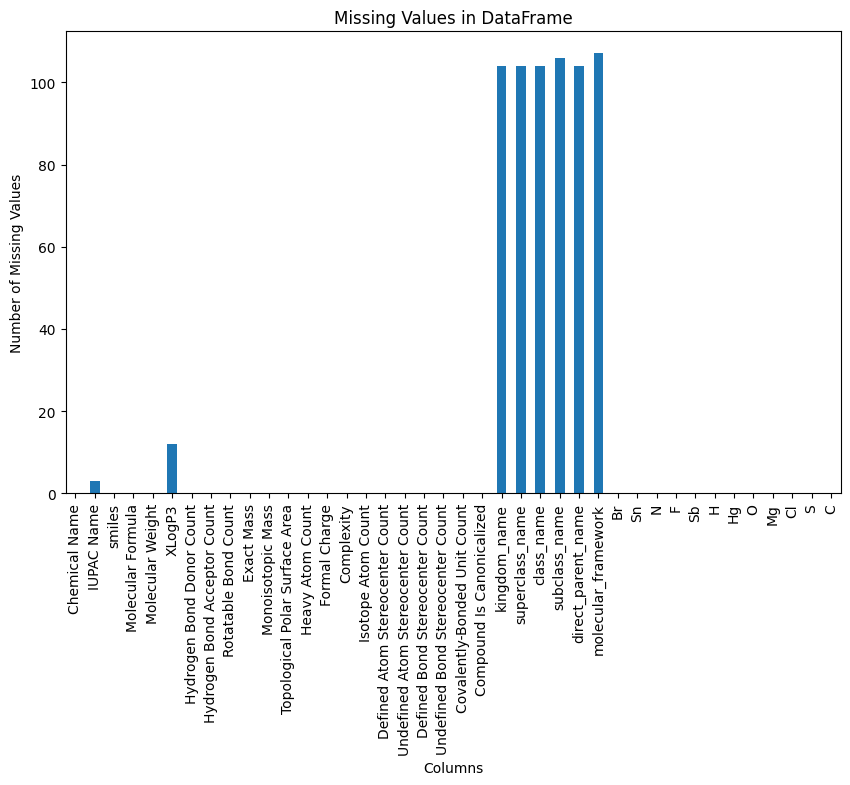

In [20]:
import matplotlib.pyplot as plt
missing_values = df.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [21]:
df["IUPAC Name"].fillna(df["Chemical Name"], inplace=True)
df.dropna(subset=['XLogP3','kingdom_name',
       'superclass_name', 'class_name', 'subclass_name',
       'direct_parent_name', 'molecular_framework'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,Chemical Name,IUPAC Name,smiles,Molecular Formula,Molecular Weight,XLogP3,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotatable Bond Count,Exact Mass,...,N,F,Sb,H,Hg,O,Mg,Cl,S,C
176,Heptapentacontane,heptapentacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C57H116,801.5 g/mol,30.5,0,0,54,800.90770370 g/mol,...,0,0,0,116,0,0,0,0,0,57
177,Pentanonacontane,pentanonacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C95H192,1334.5 g/mol,51.1,0,0,92,1334.50576096 g/mol,...,0,0,0,192,0,0,0,0,0,95
178,Tritetracontane,tritetracontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,C43H88,605.2 g/mol,22.9,0,0,40,604.68860281 g/mol,...,0,0,0,88,0,0,0,0,0,43
179,Hexatetracontane,hexatetracontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,C46H94,647.2 g/mol,24.5,0,0,43,646.73555300 g/mol,...,0,0,0,94,0,0,0,0,0,46
180,Octapentacontane,octapentacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C58H118,815.6 g/mol,31.0,0,0,55,814.92335376 g/mol,...,0,0,0,118,0,0,0,0,0,58


In [22]:
df.isna().sum()

Chemical Name                        0
IUPAC Name                           0
smiles                               0
Molecular Formula                    0
Molecular Weight                     0
XLogP3                               0
Hydrogen Bond Donor Count            0
Hydrogen Bond Acceptor Count         0
Rotatable Bond Count                 0
Exact Mass                           0
Monoisotopic Mass                    0
Topological Polar Surface Area       0
Heavy Atom Count                     0
Formal Charge                        0
Complexity                           0
Isotope Atom Count                   0
Defined Atom Stereocenter Count      0
Undefined Atom Stereocenter Count    0
Defined Bond Stereocenter Count      0
Undefined Bond Stereocenter Count    0
Covalently-Bonded Unit Count         0
Compound Is Canonicalized            0
kingdom_name                         0
superclass_name                      0
class_name                           0
subclass_name            

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Compound Is Canonicalized'] = le.fit_transform(df['Compound Is Canonicalized'])
df.head()

,Chemical Name,IUPAC Name,smiles,Molecular Formula,Molecular Weight,XLogP3,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotatable Bond Count,Exact Mass,...,N,F,Sb,H,Hg,O,Mg,Cl,S,C
0,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,382.7 g/mol,10.3,2,2,23,382.428699731 g/mol,...,2,0,0,54,0,0,0,0,0,25
1,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,311.6 g/mol,9.4,1,1,18,311.355200440 g/mol,...,1,0,0,45,0,0,0,0,0,21
2,N-Lauryldiethylenetriamine,"N'-[2-(dodecylamino)ethyl]ethane-1,2-diamine",CCCCCCCCCCCCNCCNCCN,C16H37N3,271.49 g/mol,4.0,3,3,16,271.298748193 g/mol,...,3,0,0,37,0,0,0,0,0,16
3,Dioctyl ether,1-octoxyoctane,CCCCCCCCOCCCCCCCC,C16H34O,242.44 g/mol,6.9,0,1,14,242.260965704 g/mol,...,0,0,0,34,0,1,0,0,0,16
4,Dioctylamine,N-octyloctan-1-amine,CCCCCCCCNCCCCCCCC,C16H35N,241.46 g/mol,6.6,1,1,14,241.276950121 g/mol,...,1,0,0,35,0,0,0,0,0,16


In [24]:
df['Molecular Weight']= df['Molecular Weight'].str[:-6].astype(float)
df['Exact Mass']= df['Exact Mass'].str[:-6].astype(float)
df['Monoisotopic Mass']= df['Monoisotopic Mass'].str[:-6].astype(float)
df['Topological Polar Surface Area'] = df['Topological Polar Surface Area'].str.replace('[^\d.]', '').astype(float)
df.head(5)

,Chemical Name,IUPAC Name,smiles,Molecular Formula,Molecular Weight,XLogP3,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotatable Bond Count,Exact Mass,...,N,F,Sb,H,Hg,O,Mg,Cl,S,C
0,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,382.70,10.3,2,2,23,382.428700,...,2,0,0,54,0,0,0,0,0,25
1,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,311.60,9.4,1,1,18,311.355200,...,1,0,0,45,0,0,0,0,0,21
2,N-Lauryldiethylenetriamine,"N'-[2-(dodecylamino)ethyl]ethane-1,2-diamine",CCCCCCCCCCCCNCCNCCN,C16H37N3,271.49,4.0,3,3,16,271.298748,...,3,0,0,37,0,0,0,0,0,16
3,Dioctyl ether,1-octoxyoctane,CCCCCCCCOCCCCCCCC,C16H34O,242.44,6.9,0,1,14,242.260966,...,0,0,0,34,0,1,0,0,0,16
4,Dioctylamine,N-octyloctan-1-amine,CCCCCCCCNCCCCCCCC,C16H35N,241.46,6.6,1,1,14,241.276950,...,1,0,0,35,0,0,0,0,0,16


In [25]:
print(df.columns)

Index(['Chemical Name', 'IUPAC Name', 'smiles', 'Molecular Formula',
       'Molecular Weight', 'XLogP3', 'Hydrogen Bond Donor Count',
       'Hydrogen Bond Acceptor Count', 'Rotatable Bond Count', 'Exact Mass',
       'Monoisotopic Mass', 'Topological Polar Surface Area',
       'Heavy Atom Count', 'Formal Charge', 'Complexity', 'Isotope Atom Count',
       'Defined Atom Stereocenter Count', 'Undefined Atom Stereocenter Count',
       'Defined Bond Stereocenter Count', 'Undefined Bond Stereocenter Count',
       'Covalently-Bonded Unit Count', 'Compound Is Canonicalized',
       'kingdom_name', 'superclass_name', 'class_name', 'subclass_name',
       'direct_parent_name', 'molecular_framework', 'Br', 'Sn', 'N', 'F', 'Sb',
       'H', 'Hg', 'O', 'Mg', 'Cl', 'S', 'C'],
      dtype='object')


In [26]:
columns= ['Molecular Weight', 'Hydrogen Bond Donor Count',
       'Hydrogen Bond Acceptor Count', 'Rotatable Bond Count', 'Exact Mass',
       'Monoisotopic Mass', 'Topological Polar Surface Area',
       'Heavy Atom Count', 'Formal Charge', 'Complexity', 'Isotope Atom Count',
       'Defined Atom Stereocenter Count', 'Undefined Atom Stereocenter Count',
       'Defined Bond Stereocenter Count', 'Undefined Bond Stereocenter Count',
       'Covalently-Bonded Unit Count', 'Compound Is Canonicalized', 'XLogP3']
df[columns] = df[columns].astype(float)
df.dtypes

Chemical Name                         object
IUPAC Name                            object
smiles                                object
Molecular Formula                     object
Molecular Weight                     float64
XLogP3                               float64
Hydrogen Bond Donor Count            float64
Hydrogen Bond Acceptor Count         float64
Rotatable Bond Count                 float64
Exact Mass                           float64
Monoisotopic Mass                    float64
Topological Polar Surface Area       float64
Heavy Atom Count                     float64
Formal Charge                        float64
Complexity                           float64
Isotope Atom Count                   float64
Defined Atom Stereocenter Count      float64
Undefined Atom Stereocenter Count    float64
Defined Bond Stereocenter Count      float64
Undefined Bond Stereocenter Count    float64
Covalently-Bonded Unit Count         float64
Compound Is Canonicalized            float64
kingdom_na

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

columns = ['Molecular Weight', 'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count',
               'Rotatable Bond Count', 'Exact Mass', 'Monoisotopic Mass', 'Topological Polar Surface Area',
               'Heavy Atom Count', 'Formal Charge', 'Complexity', 'Isotope Atom Count',
               'Defined Atom Stereocenter Count', 'Undefined Atom Stereocenter Count',
               'Defined Bond Stereocenter Count', 'Undefined Bond Stereocenter Count',
               'Covalently-Bonded Unit Count', 'Compound Is Canonicalized', 'XLogP3']
df[columns] = df[columns].astype(float)

scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [28]:
for x in ['kingdom_name', 'superclass_name', 'class_name', 'subclass_name',
       'direct_parent_name', 'molecular_framework']:
    print(x ,':', len(df[x].unique()))

kingdom_name : 1
superclass_name : 6
class_name : 7
subclass_name : 13
direct_parent_name : 15
molecular_framework : 3


In [29]:
df.kingdom_name.value_counts()

Organic compounds    181
Name: kingdom_name, dtype: int64

In [30]:
df.superclass_name.value_counts()

Organic oxygen compounds           50
Organic nitrogen compounds         48
Hydrocarbons                       46
Lipids and lipid-like molecules    34
Organoheterocyclic compounds        2
Organic acids and derivatives       1
Name: superclass_name, dtype: int64

In [31]:
df.class_name.value_counts()

Organooxygen compounds              50
Organonitrogen compounds            48
Saturated hydrocarbons              46
Fatty Acyls                         31
Prenol lipids                        3
Diazinanes                           2
Carboxylic acids and derivatives     1
Name: class_name, dtype: int64

In [32]:
df.subclass_name.value_counts()

Ethers                                49
Amines                                44
Alkanes                               39
Fatty alcohols                        30
Cycloalkanes                           7
Cyclohexylamines                       3
Diterpenoids                           2
Piperazines                            2
Fatty alcohol esters                   1
Dicarboxylic acids and derivatives     1
Quaternary ammonium salts              1
Carbonyl compounds                     1
Sesquiterpenoids                       1
Name: subclass_name, dtype: int64

In [33]:
df.direct_parent_name.value_counts()

Dialkyl ethers                        49
Alkanes                               39
Dialkylamines                         29
Fatty alcohols                        24
Trialkylamines                        15
Cycloalkanes                           7
Long-chain fatty alcohols              6
Cyclohexylamines                       3
Acyclic diterpenoids                   2
Piperazines                            2
Fatty alcohol esters                   1
Dicarboxylic acids and derivatives     1
Quaternary ammonium salts              1
Beta-diketones                         1
Sesquiterpenoids                       1
Name: direct_parent_name, dtype: int64

In [34]:
df.molecular_framework.value_counts()

Aliphatic acyclic compounds             161
Aliphatic homomonocyclic compounds       12
Aliphatic heteromonocyclic compounds      8
Name: molecular_framework, dtype: int64

In [35]:
columns_to_encode = ['kingdom_name', 'superclass_name', 'class_name', 'subclass_name', 'direct_parent_name', 'molecular_framework']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [36]:
df_encoded

,Chemical Name,IUPAC Name,smiles,Molecular Formula,Molecular Weight,XLogP3,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotatable Bond Count,Exact Mass,...,direct_parent_name_Fatty alcohol esters,direct_parent_name_Fatty alcohols,direct_parent_name_Long-chain fatty alcohols,direct_parent_name_Piperazines,direct_parent_name_Quaternary ammonium salts,direct_parent_name_Sesquiterpenoids,direct_parent_name_Trialkylamines,molecular_framework_Aliphatic acyclic compounds,molecular_framework_Aliphatic heteromonocyclic compounds,molecular_framework_Aliphatic homomonocyclic compounds
0,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,0.252599,0.020233,1.344858,0.800222,0.290537,0.252521,...,0,0,0,0,0,0,0,1,0,0
1,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,-0.145972,-0.099621,0.277229,-0.178428,-0.072634,-0.146073,...,0,0,0,0,0,0,0,1,0,0
2,N-Lauryldiethylenetriamine,"N'-[2-(dodecylamino)ethyl]ethane-1,2-diamine",CCCCCCCCCCCCNCCNCCN,C16H37N3,-0.370819,-0.818742,2.412486,1.778872,-0.217903,-0.370717,...,0,0,0,0,0,0,0,1,0,0
3,Dioctyl ether,1-octoxyoctane,CCCCCCCCOCCCCCCCC,C16H34O,-0.533667,-0.432547,-0.790399,-0.178428,-0.363171,-0.533566,...,0,0,0,0,0,0,0,1,0,0
4,Dioctylamine,N-octyloctan-1-amine,CCCCCCCCNCCCCCCCC,C16H35N,-0.539161,-0.472498,0.277229,-0.178428,-0.363171,-0.539085,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Heptapentacontane,heptapentacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C57H116,2.600296,2.710281,-0.790399,-1.157078,2.542200,2.599432,...,0,0,0,0,0,0,0,1,0,0
177,Pentanonacontane,pentanonacontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,C95H192,5.588173,5.453598,-0.790399,-1.157078,5.302302,5.591952,...,0,0,0,0,0,0,0,1,0,0
178,Tritetracontane,tritetracontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,C43H88,1.499883,1.698184,-0.790399,-1.157078,1.525320,1.498997,...,0,0,0,0,0,0,0,1,0,0
179,Hexatetracontane,hexatetracontane,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,C46H94,1.735325,1.911257,-0.790399,-1.157078,1.743223,1.734805,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_encoded.columns

Index(['Chemical Name', 'IUPAC Name', 'smiles', 'Molecular Formula',
       'Molecular Weight', 'XLogP3', 'Hydrogen Bond Donor Count',
       'Hydrogen Bond Acceptor Count', 'Rotatable Bond Count', 'Exact Mass',
       'Monoisotopic Mass', 'Topological Polar Surface Area',
       'Heavy Atom Count', 'Formal Charge', 'Complexity', 'Isotope Atom Count',
       'Defined Atom Stereocenter Count', 'Undefined Atom Stereocenter Count',
       'Defined Bond Stereocenter Count', 'Undefined Bond Stereocenter Count',
       'Covalently-Bonded Unit Count', 'Compound Is Canonicalized', 'Br', 'Sn',
       'N', 'F', 'Sb', 'H', 'Hg', 'O', 'Mg', 'Cl', 'S', 'C',
       'kingdom_name_Organic compounds', 'superclass_name_Hydrocarbons',
       'superclass_name_Lipids and lipid-like molecules',
       'superclass_name_Organic acids and derivatives',
       'superclass_name_Organic nitrogen compounds',
       'superclass_name_Organic oxygen compounds',
       'superclass_name_Organoheterocyclic compounds',
 

In [38]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch

tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MLM")
model = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MLM")

def convert_smiles_to_numeric(smiles):
    inputs = tokenizer(smiles, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.logits.mean(dim=1).squeeze().numpy()

df_encoded['smiles_representation'] = df_encoded['smiles'].apply(convert_smiles_to_numeric)
smiles_flat= df_encoded['smiles_representation'].tolist()

In [49]:
smiles_flat[0]

array([-16.365135  , -16.740923  , -13.286167  , -12.883312  ,
       -12.492759  , -11.710001  , -12.542498  , -12.71664   ,
       -11.224404  , -13.044898  , -11.183922  , -13.461128  ,
       -12.790164  , -13.521717  , -12.221514  ,  -1.8795165 ,
        11.544786  ,   3.624648  ,   1.2070767 ,   1.9823606 ,
         1.5423509 ,  -0.48818496,   4.1946025 ,   0.6562179 ,
       -13.213973  ,  -3.075385  ,  -1.9336373 ,  -5.113792  ,
       -12.742934  , -14.503928  , -12.443707  ,  -5.6149116 ,
        -3.7379155 , -13.493717  ,   0.36273083, -12.531855  ,
       -12.174995  , -13.391428  ,  -1.6389669 , -12.597118  ,
       -13.005572  , -13.550187  ,  -6.0836115 ,  -3.9857101 ,
        -7.9046507 ,  -2.994031  , -13.781811  , -13.694417  ,
        -5.222966  , -14.139404  , -12.5851345 , -12.261073  ,
       -12.059107  , -11.96758   ,  -4.413274  , -13.284818  ,
       -13.907911  , -12.440428  ,  -3.5770943 , -12.859387  ,
       -13.203813  , -13.232398  , -12.270158  , -10.84

In [39]:
import numpy as np

def prepare_combined_features(df,selected_features_names,smiles_flat):
  if 'smiles' in selected_features_names:
    selected_features_names.remove('smiles')
    combined_features = np.hstack((smiles_flat, df[selected_features_names]))
  else:
    combined_features = df[selected_features_names]

  return combined_features

In [40]:
selected_features_names = ['smiles', 'Molecular Weight', 'XLogP3',
                               'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count',
                               'Rotatable Bond Count', 'Exact Mass', 'Monoisotopic Mass',
                               'Topological Polar Surface Area', 'Heavy Atom Count', 'Formal Charge',
                               'Complexity', 'Isotope Atom Count', 'Defined Atom Stereocenter Count',
                               'Undefined Atom Stereocenter Count', 'Defined Bond Stereocenter Count',
                               'Undefined Bond Stereocenter Count', 'Covalently-Bonded Unit Count',
                               'Compound Is Canonicalized', 'Br', 'Sn',
                                'N', 'F', 'Sb', 'H', 'Hg', 'O', 'Mg', 'Cl', 'S', 'C',
                           'kingdom_name_Organic compounds', 'superclass_name_Hydrocarbons',
       'superclass_name_Lipids and lipid-like molecules',
       'superclass_name_Organic acids and derivatives',
       'superclass_name_Organic nitrogen compounds',
       'superclass_name_Organic oxygen compounds',
       'superclass_name_Organoheterocyclic compounds',
       'class_name_Carboxylic acids and derivatives', 'class_name_Diazinanes',
       'class_name_Fatty Acyls', 'class_name_Organonitrogen compounds',
       'class_name_Organooxygen compounds', 'class_name_Prenol lipids',
       'class_name_Saturated hydrocarbons', 'subclass_name_Alkanes',
       'subclass_name_Amines', 'subclass_name_Carbonyl compounds',
       'subclass_name_Cycloalkanes', 'subclass_name_Cyclohexylamines',
       'subclass_name_Dicarboxylic acids and derivatives',
       'subclass_name_Diterpenoids', 'subclass_name_Ethers',
       'subclass_name_Fatty alcohol esters', 'subclass_name_Fatty alcohols',
       'subclass_name_Piperazines', 'subclass_name_Quaternary ammonium salts',
       'subclass_name_Sesquiterpenoids',
       'direct_parent_name_Acyclic diterpenoids', 'direct_parent_name_Alkanes',
       'direct_parent_name_Beta-diketones', 'direct_parent_name_Cycloalkanes',
       'direct_parent_name_Cyclohexylamines',
       'direct_parent_name_Dialkyl ethers', 'direct_parent_name_Dialkylamines',
       'direct_parent_name_Dicarboxylic acids and derivatives',
       'direct_parent_name_Fatty alcohol esters',
       'direct_parent_name_Fatty alcohols',
       'direct_parent_name_Long-chain fatty alcohols',
       'direct_parent_name_Piperazines',
       'direct_parent_name_Quaternary ammonium salts',
       'direct_parent_name_Sesquiterpenoids',
       'direct_parent_name_Trialkylamines',
       'molecular_framework_Aliphatic acyclic compounds',
       'molecular_framework_Aliphatic heteromonocyclic compounds',
       'molecular_framework_Aliphatic homomonocyclic compounds']
combined_features = prepare_combined_features(df_encoded,selected_features_names,smiles_flat)


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate clustering using [derivatives] method
[clusteval] >INFO> Clusters: 6
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [6].
[clusteval] >INFO> Fin.


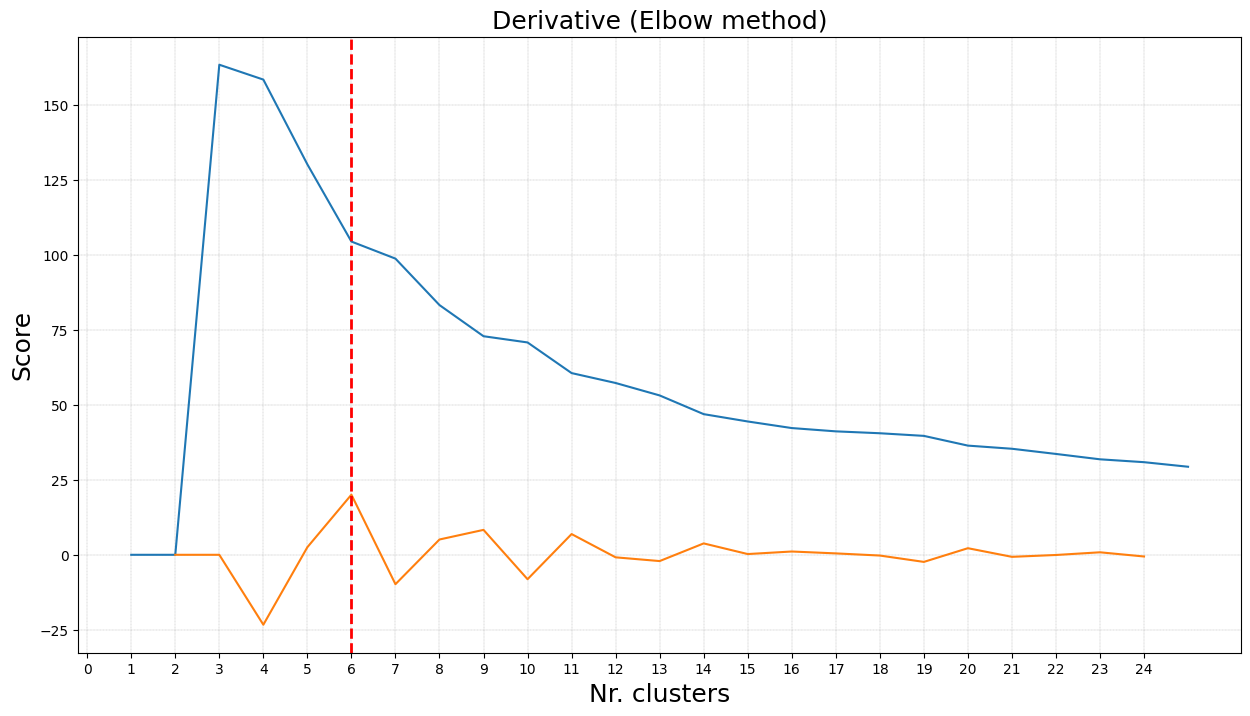

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot
[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=117.383. Be patient now..
[clusteval] >INFO> Compute cluster labels.


array([1, 1, 3, 1, 3, 2, 2, 5, 1, 1, 2, 2, 6, 5, 5, 3, 6, 3, 3, 3, 3, 3,
       6, 3, 3, 3, 3, 5, 3, 1, 5, 5, 5, 3, 6, 3, 3, 3, 5, 3, 3, 5, 3, 3,
       3, 5, 3, 1, 1, 1, 1, 1, 5, 5, 6, 2, 1, 1, 1, 2, 1, 2, 2, 5, 1, 1,
       1, 5, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 3, 1, 1, 5, 5, 6, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 3, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 3, 5, 1, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 6,
       6, 1, 5, 6, 6, 6, 6, 6, 6, 3, 3, 6, 6, 6, 6, 3, 3, 6, 4, 2, 6, 3,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 5, 3, 1, 2, 1, 3, 2, 3, 3, 3, 6,
       6, 4, 6, 6, 6], dtype=int32)

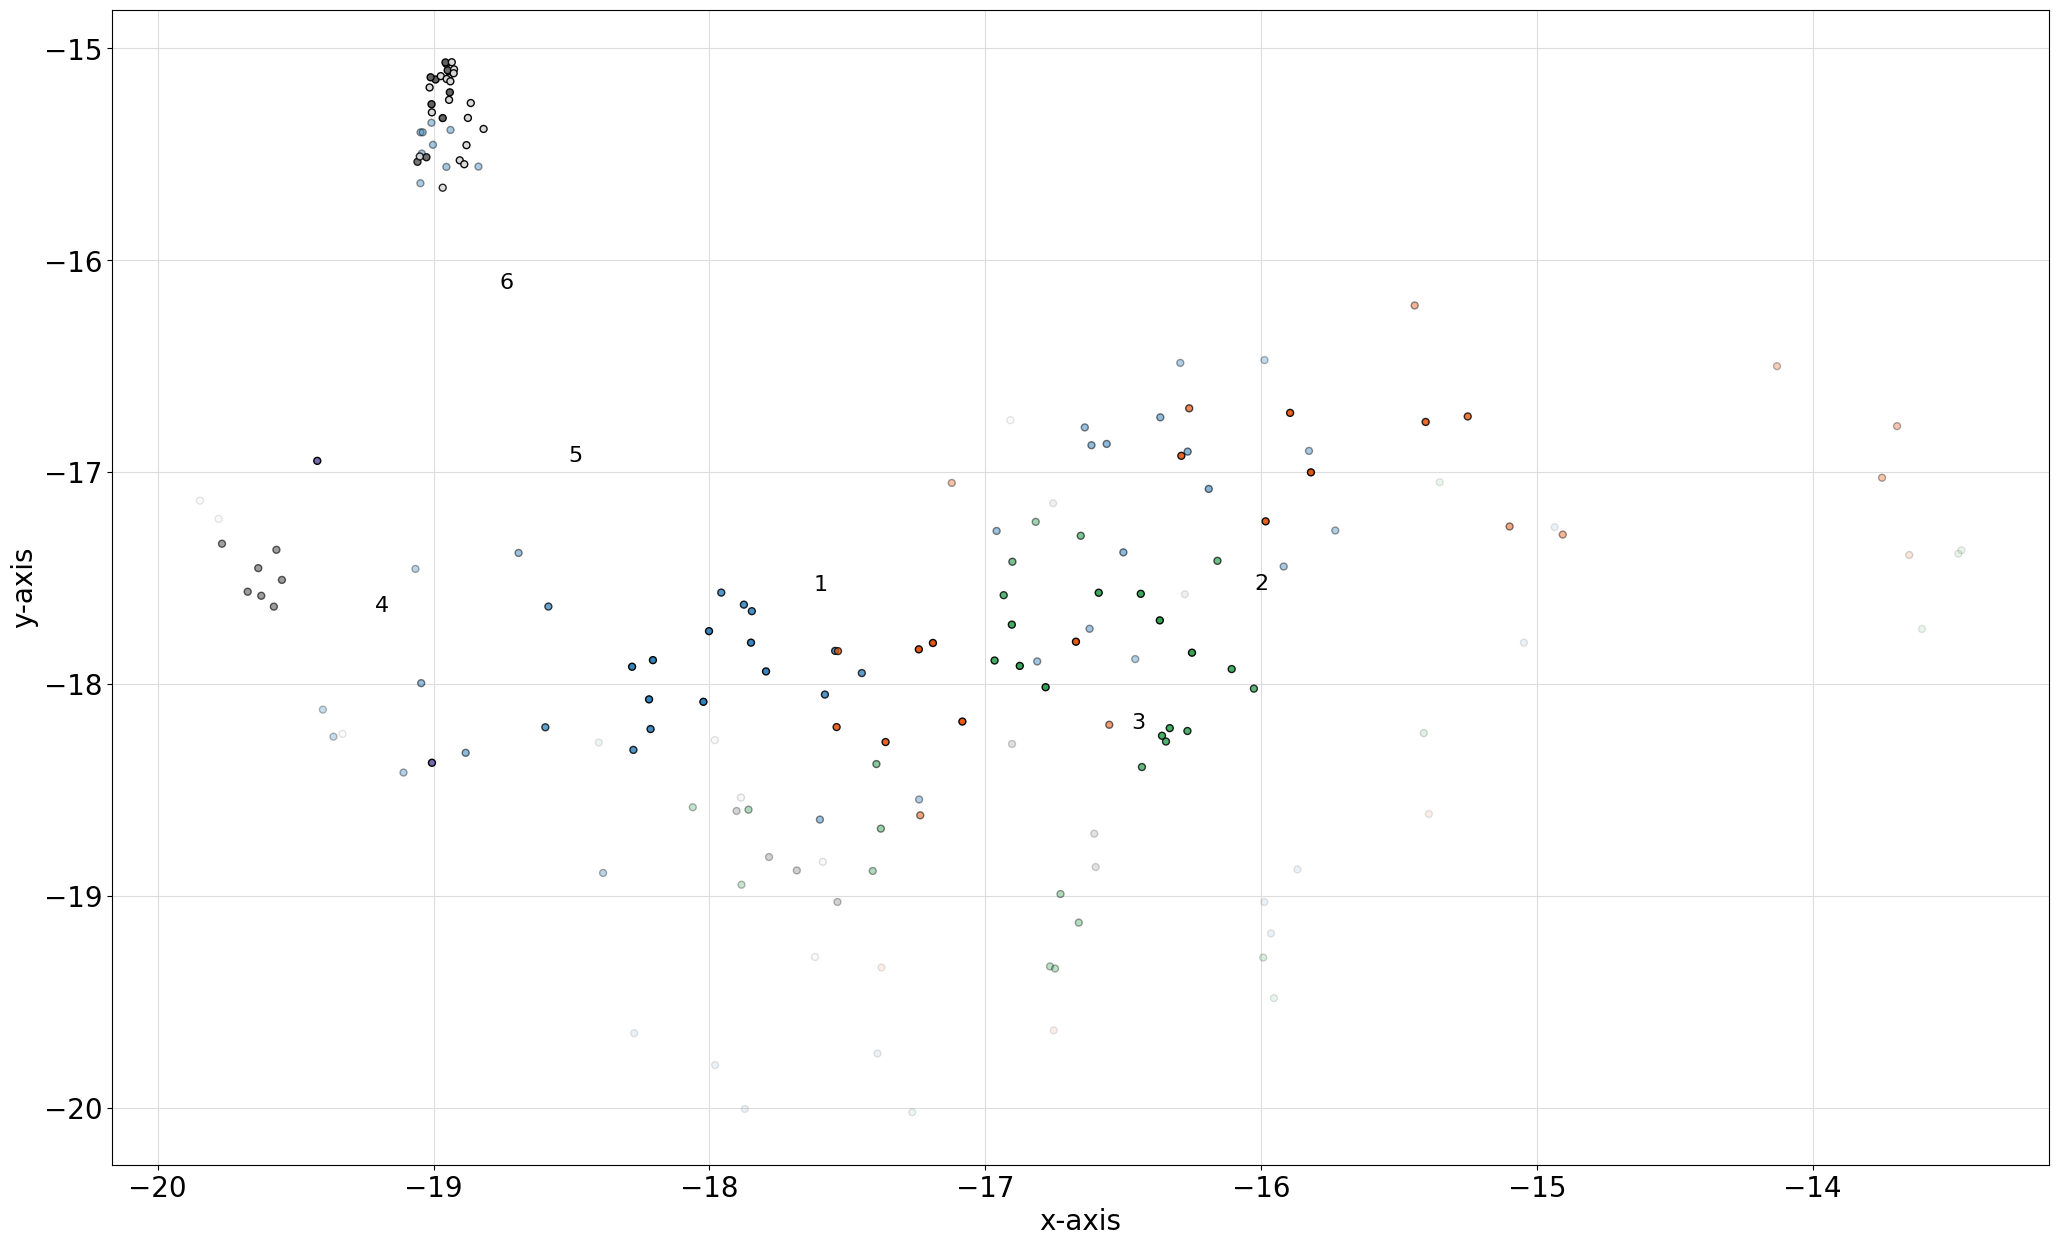

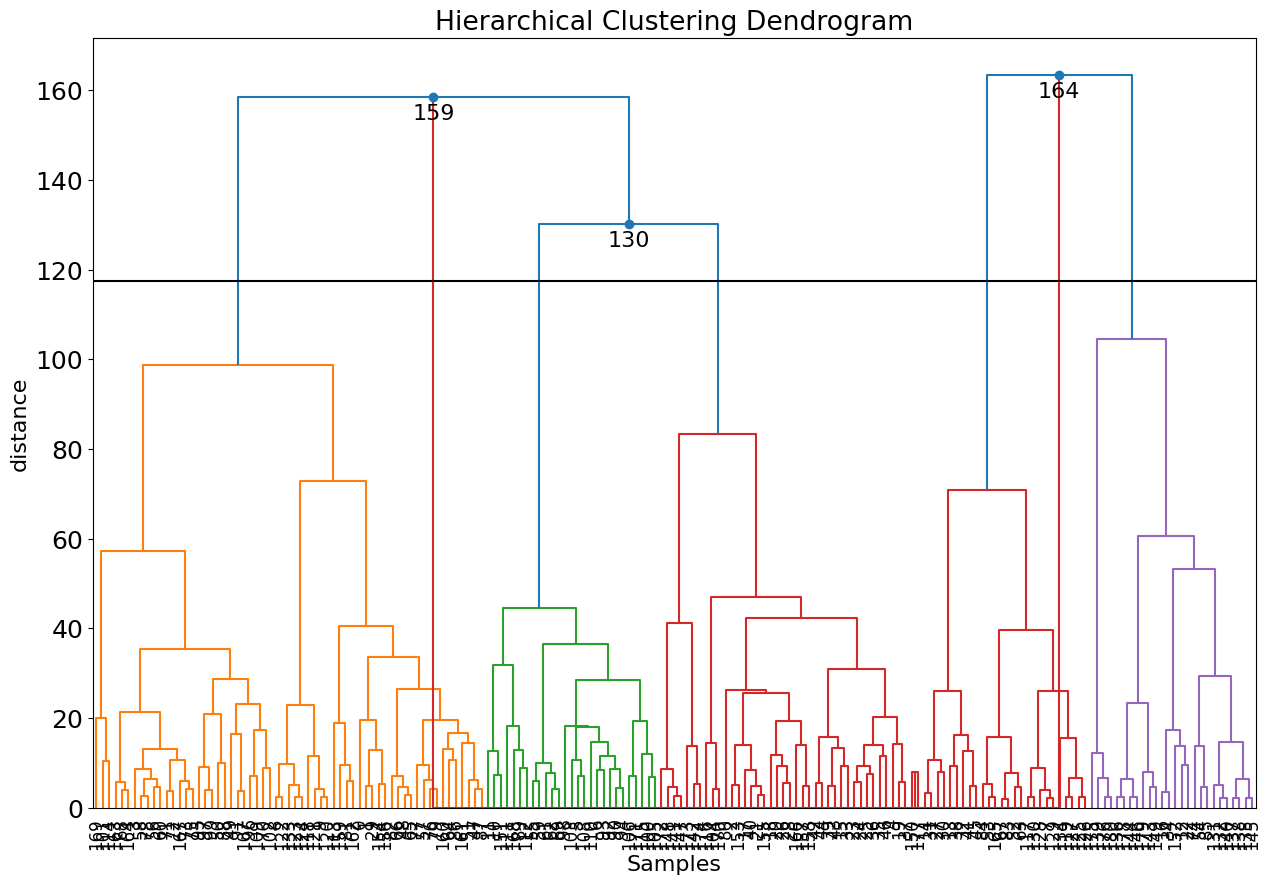

In [41]:
# Import library
from clusteval import clusteval

# Set parameters, as an example dbscan
ce = clusteval(cluster='agglomerative', evaluate='derivative')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(combined_features)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(combined_features)
ce.dendrogram()

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']
cluster_labels

In [42]:
df_encoded['cluster_label']=cluster_labels
print(df_encoded['cluster_label'].value_counts())
#df['cluster_label'].value_counts().plot(kind='barh',figsize=(20,7))

1    61
3    39
2    27
5    26
6    26
4     2
Name: cluster_label, dtype: int64


In [43]:
num_clusters = len(pd.unique(df_encoded['cluster_label']))
cluster_dict={}
for i in range(1,num_clusters+1):
  cluster_dict['CLUSTER '+str(i)]=df_encoded[df_encoded['cluster_label']==i]['Chemical Name'].to_list()

for key in cluster_dict:
  print(key, cluster_dict[key],'\n\n')

df_encoded.head()

CLUSTER 1 ['Behenyl Propylenediamine', '1-Octadecanamine, N-(1-methylethyl)-', 'Dioctyl ether', 'Eicosane', 'Hexadecane', 'N-(propan-2-yl)hexadecan-1-amine', 'Decyl ether', 'Dodecyl ether', 'Octyl octanoate', 'Octanoic anhydride', 'Dinonyl ether', '1-Ethoxydodecane', 'Eicosyl ethyl ether', '1-Ethoxytetradecane', '1-Propoxydodecane', '1-[(2-Methylpropan-2-yl)oxy]pentadecane', '1-Undecoxydodecane', '1-(Hexyloxy)octadecane', 'Hexyl octyl ether', 'Ether, dodecyl isopropyl', '1-Methoxypentadecane', '1-Methoxyhexadecane', 'Ethyl pentadecyl ether', 'Ethyl hexadecyl ether', '1-Ethoxyoctadecane', 'CID 3032547', '1-Ethoxytridecane', 'Octadecyl propyl ether', '1-[2-(Dodecyloxy)ethoxy]dodecane', 'Undecyl Ether', '2-Octoxynonane', 'Dodecyl octyl ether', 'Heptadecane-8,10-dione', '2-Methyl-1-hexadecanol', '2-Methyl-1-dodecanol', '16-Methylheptadecan-1-ol', '2-Methyl-1-undecanol', '2-Methyl-1-decanol', 'Dodec-9-en-1-ol', '13-Methyltetradecanol', '2-Methylheptadecan-1-ol', 'Isoeicosanol', '24-Methylpe

,Chemical Name,IUPAC Name,smiles,Molecular Formula,Molecular Weight,XLogP3,Hydrogen Bond Donor Count,Hydrogen Bond Acceptor Count,Rotatable Bond Count,Exact Mass,...,direct_parent_name_Long-chain fatty alcohols,direct_parent_name_Piperazines,direct_parent_name_Quaternary ammonium salts,direct_parent_name_Sesquiterpenoids,direct_parent_name_Trialkylamines,molecular_framework_Aliphatic acyclic compounds,molecular_framework_Aliphatic heteromonocyclic compounds,molecular_framework_Aliphatic homomonocyclic compounds,smiles_representation,cluster_label
0,Behenyl Propylenediamine,"2-N-docosylpropane-1,2-diamine",CCCCCCCCCCCCCCCCCCCCCCNC(C)CN,C25H54N2,0.252599,0.020233,1.344858,0.800222,0.290537,0.252521,...,0,0,0,0,0,1,0,0,"[-16.365135, -16.740923, -13.286167, -12.88331...",1
1,"1-Octadecanamine, N-(1-methylethyl)-",N-propan-2-yloctadecan-1-amine,CCCCCCCCCCCCCCCCCCNC(C)C,C21H45N,-0.145972,-0.099621,0.277229,-0.178428,-0.072634,-0.146073,...,0,0,0,0,0,1,0,0,"[-16.266056, -16.902742, -13.330881, -13.17988...",1
2,N-Lauryldiethylenetriamine,"N'-[2-(dodecylamino)ethyl]ethane-1,2-diamine",CCCCCCCCCCCCNCCNCCN,C16H37N3,-0.370819,-0.818742,2.412486,1.778872,-0.217903,-0.370717,...,0,0,0,0,0,1,0,0,"[-16.965929, -17.888485, -13.950731, -13.94611...",3
3,Dioctyl ether,1-octoxyoctane,CCCCCCCCOCCCCCCCC,C16H34O,-0.533667,-0.432547,-0.790399,-0.178428,-0.363171,-0.533566,...,0,0,0,0,0,1,0,0,"[-18.218634, -18.071932, -14.072089, -13.17489...",1
4,Dioctylamine,N-octyloctan-1-amine,CCCCCCCCNCCCCCCCC,C16H35N,-0.539161,-0.472498,0.277229,-0.178428,-0.363171,-0.539085,...,0,0,0,0,0,1,0,0,"[-18.400824, -18.275663, -14.097788, -14.21544...",3


In [44]:

output_filename = 'cluster_data.csv'

with open(output_filename, 'w') as f:
    f.write('Cluster,Chemical Name\n')

    for key in cluster_dict:
        cluster = key
        chemical_names = ', '.join(cluster_dict[key])
        f.write(f'"{cluster}","{chemical_names}"\n')

In [47]:
from sklearn.neighbors import NearestNeighbors

input_chemical_name = 'Isotridecanol'

input_cluster = None
for cluster, chemicals in cluster_dict.items():
    if input_chemical_name in chemicals:
        input_cluster = cluster
        break
print(input_cluster)

if input_cluster is None:
    print("Input chemical not found in any cluster")
else:
    cluster_chemicals = cluster_dict[input_cluster]
    cluster_properties = combined_features[df['Chemical Name'].isin(cluster_chemicals)]


CLUSTER 2


In [48]:
num_neighbors = 11
if len(cluster_chemicals)<num_neighbors:
  num_neighbors= len(cluster_chemicals)

knn_model = NearestNeighbors(n_neighbors=num_neighbors)
knn_model.fit(cluster_properties)

input_chemical_features = cluster_properties[cluster_chemicals.index(input_chemical_name)]
distances, indices = knn_model.kneighbors([input_chemical_features])


print("Nearest neighbors for", input_chemical_name)
for rank, (distance, index) in enumerate(zip(distances[0], indices[0])):
  neighbor_chemical_name = cluster_chemicals[index]
  print(f"Rank-{rank} : {neighbor_chemical_name} (Distance: {distance:.4f})")

Nearest neighbors for Isotridecanol
Rank-0 : Isotridecanol (Distance: 0.0000)
Rank-1 : 9-Methyldecan-1-ol (Distance: 7.0739)
Rank-2 : 2-(8-Methylnonoxy)ethanol (Distance: 11.0843)
Rank-3 : Isodecanol (Distance: 11.3981)
Rank-4 : 1-Ethoxyundecane (Distance: 12.4654)
Rank-5 : 1-Propoxynonane (Distance: 13.0966)
Rank-6 : 2,7-Dimethyl-1-octanol (Distance: 14.4012)
Rank-7 : Octane, 1-propoxy- (Distance: 14.4093)
Rank-8 : Isononyl alcohol (Distance: 14.8520)
Rank-9 : Decyl ethyl ether (Distance: 14.8683)
Rank-10 : 5-Methyl-1-nonanol (Distance: 15.2052)
